<a href="https://colab.research.google.com/github/rsmarinho/filtros/blob/main/pyscripts/sintese_de_ladder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizar com o **exemplo08.sch**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Butterworth Ladder

---

In [2]:
N = 6
e = 1

k = np.linspace(1, N, N) # devices

Ck = 2*e**(1/N) * np.sin( ((2*k[0::2]-1) / (2*N)) * np.pi)
Lk = 2*e**(1/N) * np.sin( ((2*k[1::2]-1) / (2*N)) * np.pi)

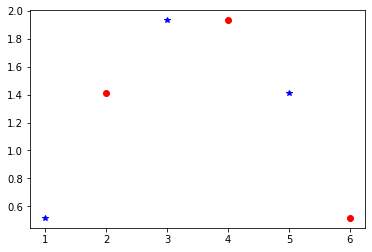

In [3]:
plt.plot(k[0::2], Ck, 'b*')
plt.plot(k[1::2], Lk, 'ro')

In [4]:
print(Ck)
print(Lk)

[0.51763809 1.93185165 1.41421356]
[1.41421356 1.93185165 0.51763809]


Chebyshev Ladder

---

In [14]:
N = 6
AMAX = 1
e = np.sqrt(10**(AMAX/10) - 1)

k = np.linspace(1, N//2, N//2) # devices
print(k)

h = ( (1/e) + np.sqrt( 1 + (1/e) ) )**(1/N)
x = h - (1/h)

C1 = ( 4*np.sin( np.pi / ( 2*N ) ) ) / x

[1. 2. 3.]


In [15]:
Lk = np.zeros(N//2)
Ck = np.zeros(N//2)

In [16]:
C2km1L2k = ( 16*np.sin( (4*k-3) * np.pi / (2*N) )*np.sin( (4*k-1) * np.pi / (2*N) ) ) / ( x**2 + 4*np.sin(  (2*k-1) * np.pi / N  )**2 )
C2kM1L2k = ( 16*np.sin( (4*k-1) * np.pi / (2*N) )*np.sin( (4*k+1) * np.pi / (2*N) ) ) / ( x**2 + 4*np.sin(  2*k * np.pi / N  )**2 )

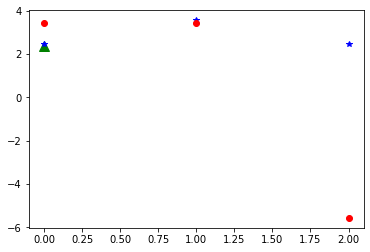

In [17]:
plt.plot(C1, 'g^', ms=10)
plt.plot(C2km1L2k, 'b*')
plt.plot(C2kM1L2k, 'ro')

In [18]:
print(C1)
print(C2km1L2k)
print(C2kM1L2k)

2.361522667849656
[2.45615719 3.56095675 2.45615719]
[ 3.42342002  3.42342002 -5.57678931]


|                  |  $k=1$   |  $k=2$   |  $k=2$   |
|------------------|:--------:|:--------:|:--------:|
| $C_{2k-1}L_{2k}$ | $C_1L_2$ | $C_3L_4$ | $C_5L_6$ |
| $C_{2k+1}L_{2k}$ | $C_3L_2$ | $C_5L_4$ | $C_7L_6$ |

In [19]:
# Ck[0] = C1
# Lk[0] = C2km1L2k[0]/Ck[0]

# Ck[1] = C2kM1L2k[0]/Lk[0]
# Lk[1] = C2km1L2k[1]/Ck[1]

# Ck[2] = C2kM1L2k[1]/Lk[1]
# Lk[2] = C2km1L2k[2]/Ck[2]

In [20]:
Ck[0] = C1
Lk[0] = C2km1L2k[0]/Ck[0]

for i in k[:-1]:
  Ck[int(i)] = C2kM1L2k[int(i-1)]/Lk[int(i-1)]
  Lk[int(i)] = C2km1L2k[int(i)]/Ck[int(i)]

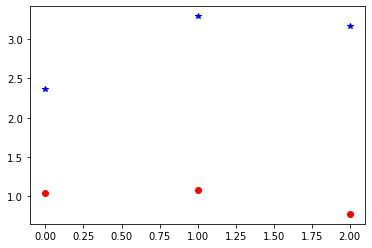

In [21]:
plt.plot(Ck, 'b*')
plt.plot(Lk, 'ro')

In [22]:
print(Ck)
print(Lk)

[2.36152267 3.29151734 3.1643873 ]
[1.04007352 1.08185873 0.77618728]


Para redes pares $k=1,2,\cdots,n/2$ e $R_2\neq 1$. Esse resistor pode ser determinado por 
$$
R_2=\dfrac{L_n}{C_1}
$$
Para redes ímpares $k=1,2,\cdots,(n-1)/2$ e $R_2=1$. O último elemento $C_n$ é determinado a partir de 
$$
C_n=C_1
$$